<a href="https://colab.research.google.com/github/YuanChenhang/USAAIO/blob/main/PyTorch_Tensors%2C_data_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# **Common Tensor data types**

* **```torch.uint8```:** 8-bit unsigned integer.

    Applications: Image pixel intensity 0-255

* **```torch.int32```:** 32-bit signed integer.

    Typical integer type.

* **```torch.int64``` (or ```torch.long```):** 64-bit signed integer.

    Applications: Label indices (such as being used in ```nn.CrossEntropyLoss```)

* **```torch.float32```:** 32-bit floating point.

    Typical float type.

* **```torch.bool```:** boolean.

    Applications: Masking in NLP, filtering data in certain positions


**Create tensors by specifying datatypes**

In [ ]:
x = torch.tensor([1, 2, -5], dtype=torch.float64)
print(x.dtype)

torch.float64


**Change datatypes**

* In-place change is not supported

In [ ]:
x = torch.tensor([1, 2, -5], dtype=torch.float64)
print(x.dtype)

# Method 1: Use to()
y = x.to(dtype = torch.bool)
print(y.dtype)
print(x.dtype)

# Method 2: Use type()
z = x.type(torch.long)
print(z.dtype)
print(x.dtype)

torch.float64
torch.bool
torch.float64
torch.int64
torch.float64


**Application of boolean type: advanced/fancy indexing**

In [ ]:
x = torch.randn(4, 6)
print(x)

filter = torch.randn_like(x) > 0.1
print(filter)

x[filter] = float('-inf')
print(x)

tensor([[-0.6675,  0.2827,  0.0321,  1.2967,  0.5361,  0.4804],
        [ 1.0305, -1.2136, -1.2119, -0.1193, -0.5865, -0.0035],
        [-0.5358, -0.2086, -0.1830,  0.1124, -0.3075,  0.5511],
        [-0.6163,  0.2206, -0.2167, -2.4313, -0.2327, -1.6267]])
tensor([[ True, False, False,  True, False, False],
        [False, False, False, False, False, False],
        [ True, False, False,  True, False,  True],
        [ True, False,  True, False,  True, False]])
tensor([[   -inf,  0.2827,  0.0321,    -inf,  0.5361,  0.4804],
        [ 1.0305, -1.2136, -1.2119, -0.1193, -0.5865, -0.0035],
        [   -inf, -0.2086, -0.1830,    -inf, -0.3075,    -inf],
        [   -inf,  0.2206,    -inf, -2.4313,    -inf, -1.6267]])


# **Exercise: Convert image data**

* Input: ```uint8``` pixel intensities, 0-255
* Normalized to 0-1 with data type ```torch.float32```
* Add pattern to the data
* Output: Convert back to ```uint8``` in numpy


**Create a synthetic dataset using numpy**

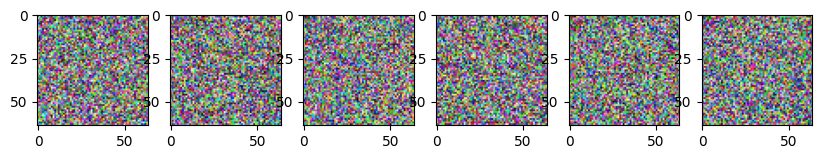

In [ ]:
num_channels = 3
height = 64
width = 64
num_images = 6

images = np.random.randint(0, 256, size=(num_images, height, width, num_channels), dtype=np.uint8)

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
plt.show()

**Convert to tensors and normalize values to 0-1**

In [ ]:
images_tensors = torch.from_numpy(images).to(torch.float32) / 255
print(images_tensors.shape)
print(images_tensors.dtype)

torch.Size([6, 64, 64, 3])
torch.float32


**For each image, paint the top left quarter circle with a single color**

In [ ]:
# Create painting colors for images
colors = torch.rand(num_images, num_channels) # shape: (num_images, num_channels)

# Compute painted positions
radius = min(height, width) / 2
center = torch.tensor([height/2, width/2])

H, W = torch.meshgrid(torch.arange(height), torch.arange(width)) # shape: (height, width)
lattice_coordinates = torch.stack([H, W], dim = -1) # shape: (height, width, 2)
shall_be_painted = (torch.max(lattice_coordinates - center, dim = -1)[0] <= 0) \
               & (torch.sum(torch.pow(lattice_coordinates - center, 2), dim = -1) <= radius**2) # shape: (height, width)

images_tensors[:, shall_be_painted, :] = colors.unsqueeze(1) # shape: (num_images, num_pixel_painted, num_channels)

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


**Convert tensors from floats in the range 0-1 to integer values in the range 0-255**

In [ ]:
images_tensors_int = (images_tensors * 255).to(torch.uint8)

**Convert from tensors to numpy objects, and display images**

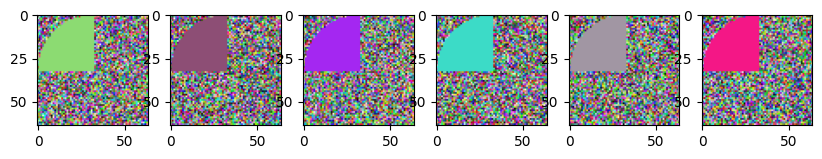

In [ ]:
images_modified = images_tensors_int.numpy()

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images_modified[i])
plt.show()

**Copyright  Beaver-Edge AI Institute. All Rights Reserved. No part of this document may be copied or reproduced without the written permission of Beaver-Edge AI Institute.**